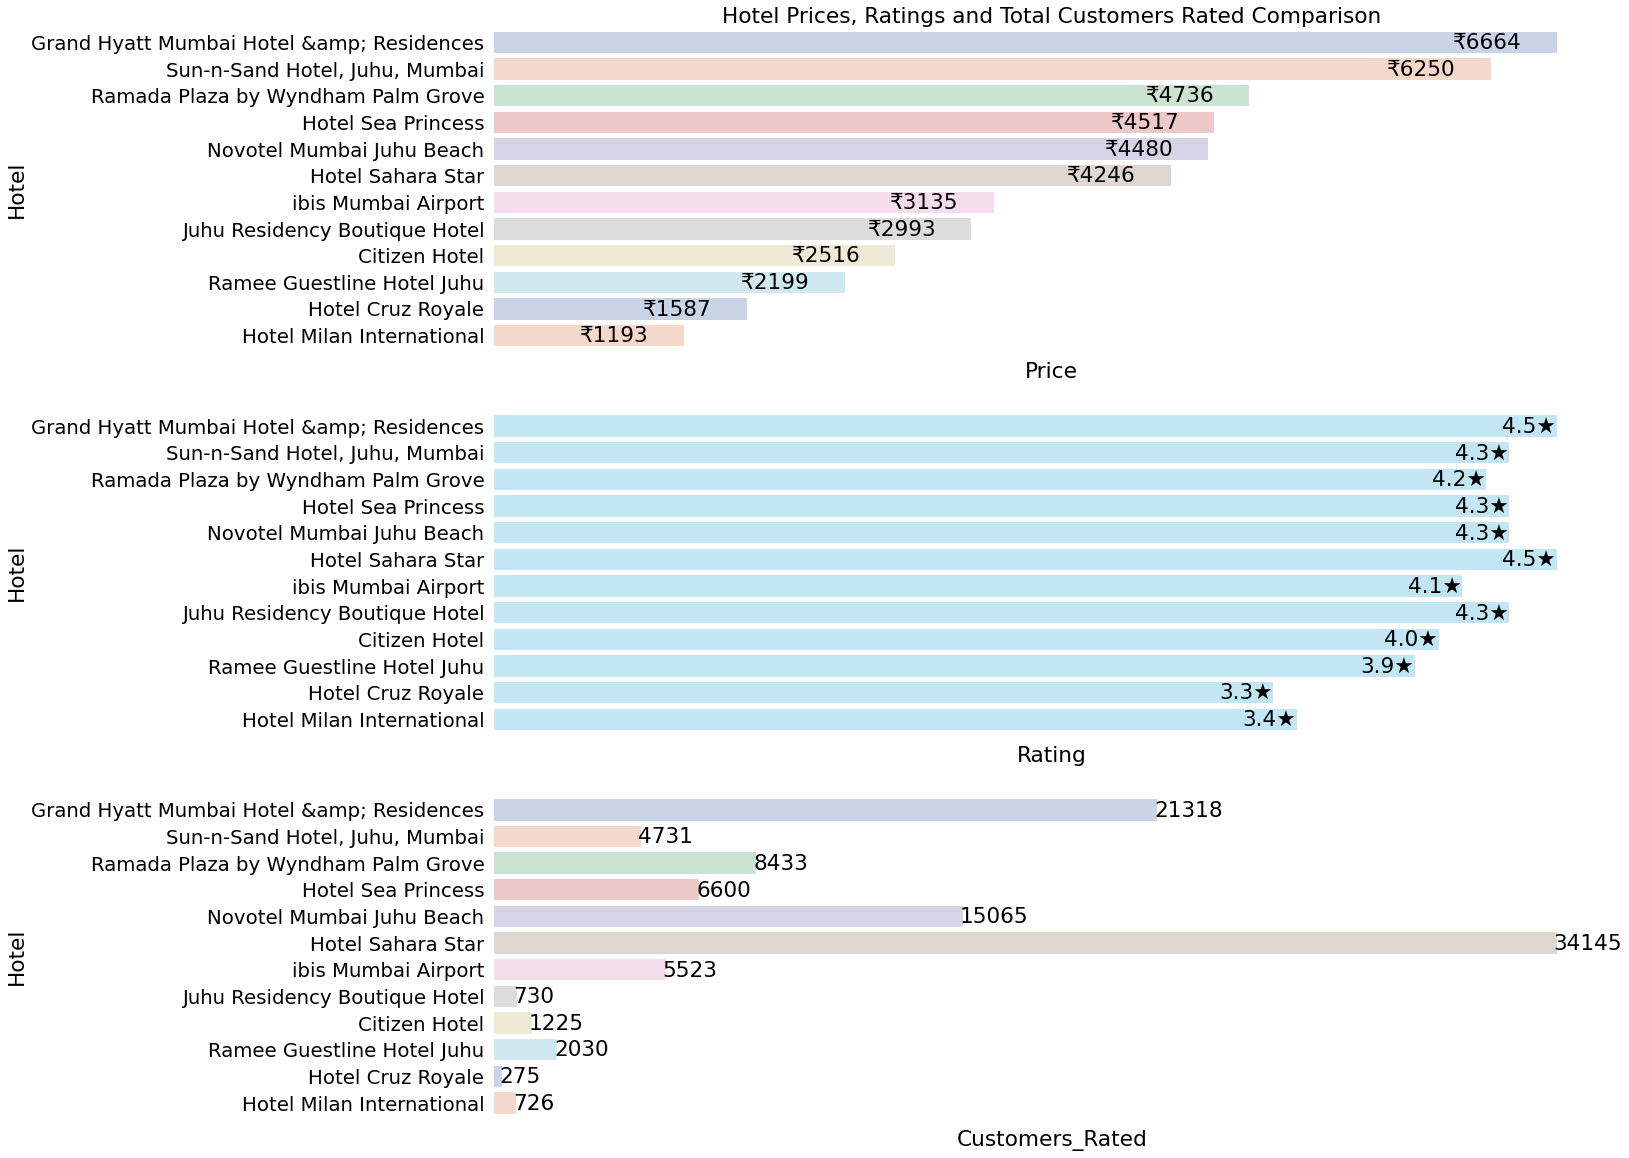

Took 6.630509853363037 seconds to Run.


In [1]:
import time
startTime = time.time()
def hotelRealTime():
    # Importing all required libraries
    # !pip install bs4
    # !pip install matplotlib
    # !pip install seaborn
    import pandas as pd
    import numpy as  np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import requests
    import re
    from bs4 import BeautifulSoup
    from numpy import median
    # URL of the site from where data is extracted using request and BeautifulSoup libraries
    url = "https://www.google.com/travel/hotels/Mumbai?g2lb=2502548%2C4258168%2C4270442%2C4306835%2C4317915%2C4371335%2C4401769%2C4419364%2C4429192%2C4482438%2C4486153%2C4509341%2C4524134%2C4533547%2C4533548%2C4533882%2C4536454%2C4547627%2C4270859%2C4284970%2C4291517&hl=en-IN&gl=in&cs=1&ssta=1&ap=aAE&q=juhu%20hotels&rp=EMaW74Pl8vaAChCmiL67me393GwQqqT4zp6RhsMSEPOBovqAg7-zBzgBQABIAqIBGUp1aHUsIE11bWJhaSwgTWFoYXJhc2h0cmE&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwjYj-Oj4uHwAhUAAAAAHQAAAAAQBw&utm_campaign=sharing&utm_medium=link&utm_source=htls&ts=CAESABo9Ch8SGzoZSnVodSwgTXVtYmFpLCBNYWhhcmFzaHRyYRoAEhoSFAoHCOUPEAUYGRIHCOUPEAUYGhgBMgIQACoPCgsoAUoCIAE6A0lOUhoA"  # "https://www.travelguru.com/hotels/5-star-hotels-near-juhu-beach-in-mumbai"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get(url, headers=headers)#, proxies=proxies)
    htmlContent = r.content
    soup = BeautifulSoup(htmlContent, 'html.parser')
    # From the html data specific class data is been extracted usind find_all
    price_data = soup.find_all('a', class_="OxGZuc W8vlAc lRagtb")
    price_data = list(price_data)
    rating_data = soup.find_all('a', class_="spNMC lRagtb")
    rating_data = list(rating_data)
    # By using regex string slicing is done & extracted required lines of data in list
    price_list = []
    for a in price_data:
        pattern = """
        (?P<Price>[\d].*[\,][\d]+)
        (\,\ )
        (?P<Hotel>.*)
        (\"\ class\=\"OxGZuc\ W8vlAc\ lRagtb\")
        """
        for item in re.finditer(pattern, str(a), re.VERBOSE):
            price_list.append(item.groupdict())
    # By using regex string slicing is done & extracted required lines of data in list
    rating_list = []        
    for a in rating_data:
        pattern = """
        (?P<Rating>[\d+].*)
        (\ out\ of\ 5\ stars\ from\ )
        (?P<Customers_Rated>.*)
        (\ reviews\,\ )
        (?P<Hotel>.*)
        (\"\ class\=\"spNMC\ lRagtb\")
        """
        for item in re.finditer(pattern, str(a), re.VERBOSE):
            rating_list.append(item.groupdict())
    # Dataframes created            
    df1 = pd.DataFrame(price_list)
    df2 = pd.DataFrame(rating_list)
    # Merging two dataframes
    df = pd.merge(left=df1, right=df2, how='inner', left_on=df1.Hotel, right_on=df2.Hotel)
    df = df.drop_duplicates(subset="key_0")
    df["Hotel"] = df["Hotel_x"]
    df = df[['Hotel', 'Rating', 'Customers_Rated', 'Price']]
    # Converting series data to numeric data
    df.Price = df.Price.str.replace(',','')
    df.Price = pd.to_numeric(df.Price)
    df.Rating = pd.to_numeric(df.Rating)
    df.Customers_Rated = df.Customers_Rated.str.replace(',','')
    df.Customers_Rated = pd.to_numeric(df.Customers_Rated)
    # Sorting dataframe
    df = df.sort_values('Price', ascending=False)
    # Plotting graph for price, rating and review comparison
    plt.figure(figsize=(20,20))
    sns.axes_style('white')
    sns.set_color_codes("muted")
    sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 1})
    # Plot -1
    plt.subplot(3,1,1)
    sns.despine(left=True, bottom=True)
    plt.title('Hotel Prices, Ratings and Total Customers Rated Comparison')
    plot1 = sns.barplot(x=df.Price, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
    plot1.tick_params(left=False,bottom=False)
    plot1.set(xticklabels=[])
    for i, v in enumerate(df.Price):
        plt.text(v - 650, i + .25, u"\u20B9"+str(v), color = 'black')
    # Plot -2
    plt.subplot(3,1,2)
    sns.despine(left=True, bottom=True)
    plot2 = sns.barplot(x=df.Rating, y=df.Hotel, data=df, alpha=.5, estimator=median, ci=None, color='skyblue', saturation=2.5)
    plot2.tick_params(left=False,bottom=False)
    plot2.set(xticklabels=[])
    for i, v in enumerate(df.Rating):
        plt.text(v - 0.23, i + .25, str(v)+u"\u2605", color = 'black')
    # Plot -3
    plt.subplot(3,1,3)
    sns.despine(left=True, bottom=True)
    plot3 = sns.barplot(x=df.Customers_Rated, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
    plot3.tick_params(left=False,bottom=False)
    plot3.set(xticklabels=[])
    for i, v in enumerate(df.Customers_Rated):
        plt.text(v - 100, i + .25, str(v), color = 'black')
    # Saving graph to desires format(.pdf, .jpg, .png) 
    plt.savefig('hotel.pdf', bbox_inches='tight')
    return plt.show()
hotelRealTime()
endTime = time.time()
print('Took %s seconds to Run.' % (endTime-startTime))

<ipython-input-2-b63b7a30b57f>:60: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Price = df.Price.str.replace(r'\D+', '').astype('int')
<ipython-input-2-b63b7a30b57f>:62: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Customers_Rated = df.Customers_Rated.str.replace(r'\D+', '').astype('int')


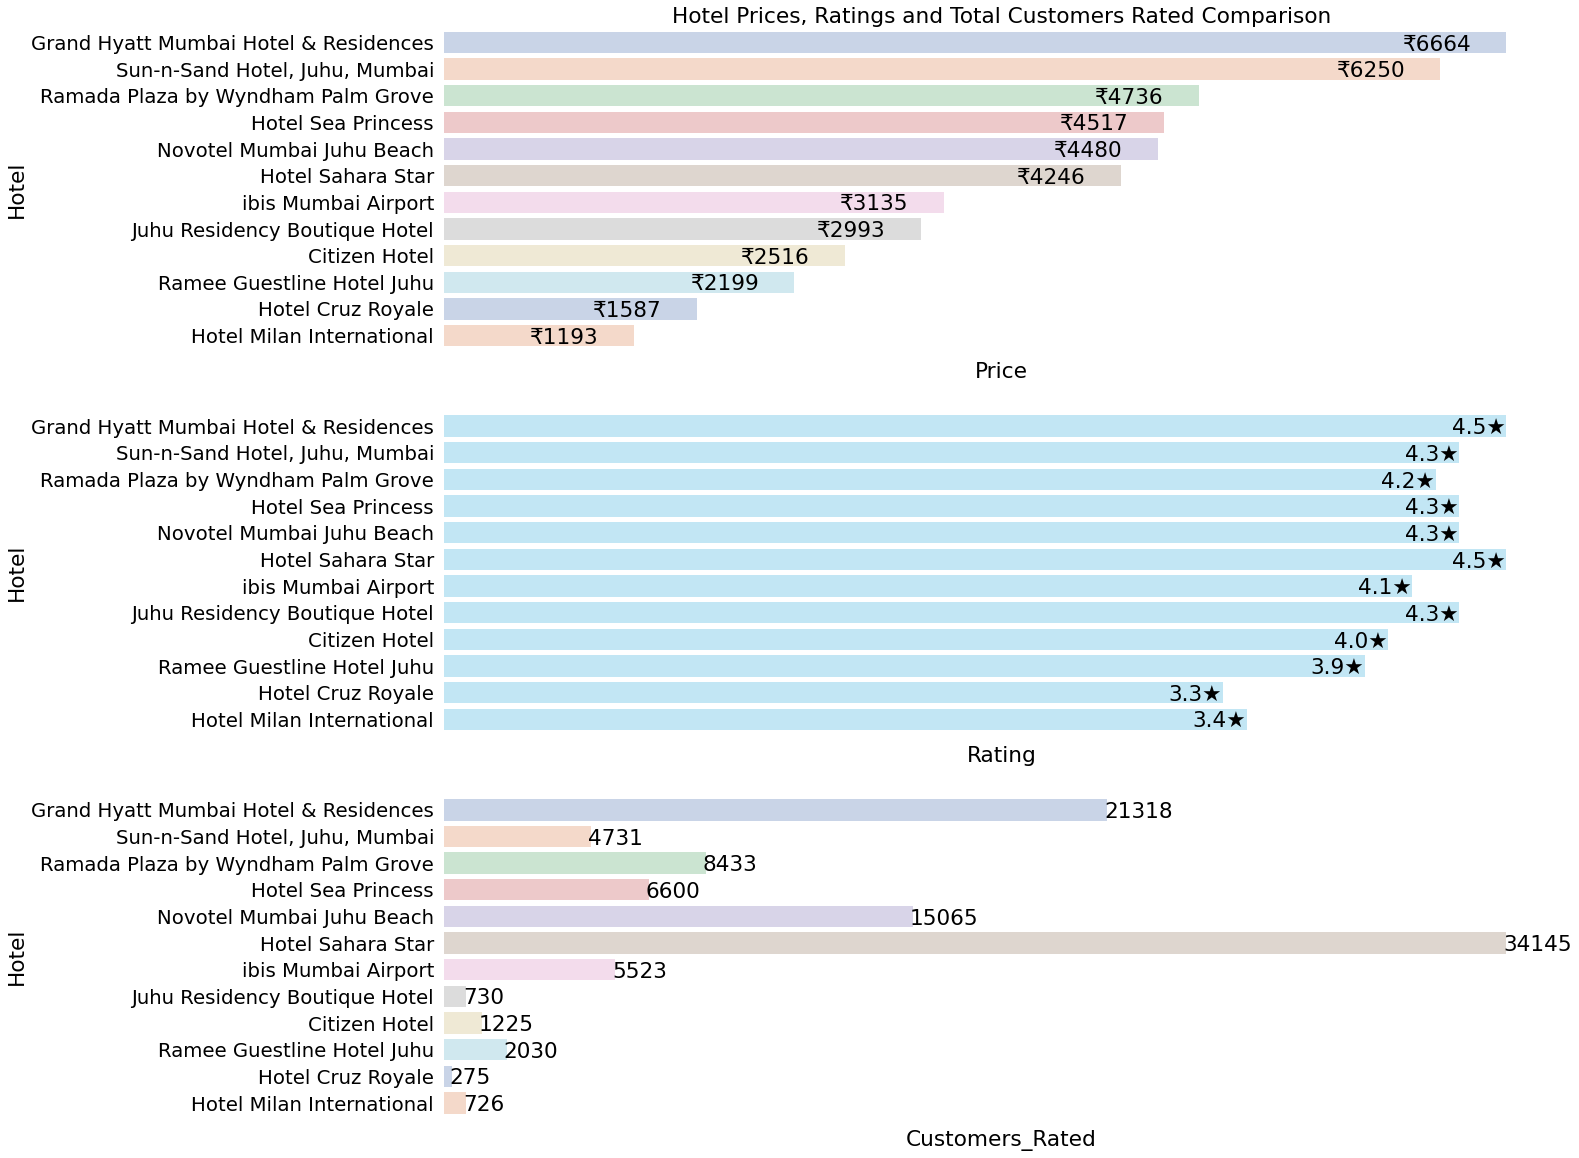

Took 2.7859556674957275 seconds to Run.


In [2]:
import time
startTime2 = time.time()
def hotelRealTime2():
    # Importing all required libraries
    # !pip install bs4
    # !pip install matplotlib
    # !pip install seaborn
    import pandas as pd
    import numpy as  np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import requests
    import re
    from bs4 import BeautifulSoup
    from numpy import median
    # URL of the site from where data is extracted using request and BeautifulSoup libraries
    url = "https://www.google.com/travel/hotels/Mumbai?g2lb=2502548%2C4258168%2C4270442%2C4306835%2C4317915%2C4371335%2C4401769%2C4419364%2C4429192%2C4482438%2C4486153%2C4509341%2C4524134%2C4533547%2C4533548%2C4533882%2C4536454%2C4547627%2C4270859%2C4284970%2C4291517&hl=en-IN&gl=in&cs=1&ssta=1&ap=aAE&q=juhu%20hotels&rp=EMaW74Pl8vaAChCmiL67me393GwQqqT4zp6RhsMSEPOBovqAg7-zBzgBQABIAqIBGUp1aHUsIE11bWJhaSwgTWFoYXJhc2h0cmE&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwjYj-Oj4uHwAhUAAAAAHQAAAAAQBw&utm_campaign=sharing&utm_medium=link&utm_source=htls&ts=CAESABo9Ch8SGzoZSnVodSwgTXVtYmFpLCBNYWhhcmFzaHRyYRoAEhoSFAoHCOUPEAUYGRIHCOUPEAUYGhgBMgIQACoPCgsoAUoCIAE6A0lOUhoA"  # "https://www.travelguru.com/hotels/5-star-hotels-near-juhu-beach-in-mumbai"  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get(url, headers=headers)#, proxies=proxies)
    htmlContent = r.content
    soup = BeautifulSoup(htmlContent)
    # From the html-data specific class data is been extracted usind find_all
    all_data = []
    for d in soup.findAll('div', attrs={'class':"yGKfaf ev5GFe"}):
        hotel = d.find('h2', attrs={'class':"BgYkof ogfYpf ykx2he"})
        rating = d.find('span', attrs={'class':"KFi5wf lA0BZ"})
        customers_rated = d.find('span', attrs={'class':"jdzyld XLC8M"})
        price = d.find('span', attrs={'class':"W9vOvb nDkDDb"})
        all1=[]
        if hotel is not None:
            all1.append(hotel.text)
        else:
            all1.append("unknown")
        if rating is not None:
            all1.append(rating.text)
        else:    
            all1.append('0')
        if customers_rated is not None:
            all1.append(customers_rated.text)
        else:
            all1.append('0')     
        if price is not None:
            all1.append(price.text)
        elif price is None:
            try :
                price = d.find('div', attrs={'class':"JGa7fd"}).get('aria-label')
            except :
                pass  
            if price is not None:
                all1.append(price)
            else:    
                all1.append(None)
        all_data.append(all1)
    # Dataframes created 
    df = pd.DataFrame(all_data,columns=['Hotel', 'Rating', 'Customers_Rated', 'Price'])
    # df.to_csv('hotel_data.csv', index=False, encoding='utf-8')
    # Droped Null from table
    df.dropna(inplace=True)
    # Removed unwanted charecters and converted to numeric
    df.Price = df.Price.str.replace(r'\D+', '').astype('int')
    df.Rating = pd.to_numeric(df.Rating)
    df.Customers_Rated = df.Customers_Rated.str.replace(r'\D+', '').astype('int')
    df = df.drop_duplicates(subset="Hotel")
    df = df.sort_values('Price', ascending=False)
    # Plotting graph for price, rating and review comparison
    plt.figure(figsize=(20,20))
    sns.axes_style('white')
    sns.set_color_codes("muted")
    sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 1})
    # Plot -1
    plt.subplot(3,1,1)
    sns.despine(left=True, bottom=True)
    plt.title('Hotel Prices, Ratings and Total Customers Rated Comparison')
    plot1 = sns.barplot(x=df.Price, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
    plot1.tick_params(left=False,bottom=False)
    plot1.set(xticklabels=[])
    for i, v in enumerate(df.Price):
        plt.text(v - 650, i + .3, u"\u20B9"+str(v), color = 'black')
    # Plot -2
    plt.subplot(3,1,2)
    sns.despine(left=True, bottom=True)
    plot2 = sns.barplot(x=df.Rating, y=df.Hotel, data=df, alpha=.5, estimator=median, ci=None, color='skyblue', saturation=2.5)
    plot2.tick_params(left=False,bottom=False)
    plot2.set(xticklabels=[])
    for i, v in enumerate(df.Rating):
        plt.text(v - 0.23, i + .3, str(v)+u"\u2605", color = 'black')
    # Plot -3
    plt.subplot(3,1,3)
    sns.despine(left=True, bottom=True)
    plot3 = sns.barplot(x=df.Customers_Rated, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
    plot3.tick_params(left=False,bottom=False)
    plot3.set(xticklabels=[])
    for i, v in enumerate(df.Customers_Rated):
        plt.text(v - 100, i + .3, str(v), color = 'black')
    # Saving graph to desires format(.pdf, .jpg, .png) 
    plt.savefig('hotel2.pdf', bbox_inches='tight')
    return plt.show()
hotelRealTime2()
endTime2 = time.time()
print('Took %s seconds to Run.' % (endTime2-startTime2))

In [3]:
# # While Loop for continues tracking of data at defined intervals
# import time
# i = 0
# while i < i+1:
#     print(f'Execution {i+1} Started...Please Wait...While Processing')
#     hotelRealTime()
#     time.sleep(10)
#     i+=1   